## Try 7.3.1: Residual plots in Python

**The code below fits a simple linear regression model object using the crab data. Residual plots are created using the fitted model.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

**Use the plots to evaluate the linear regression assumptions for the crab data.**

In [1]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Import data
crabs = pd.read_csv('crab-groups.csv')

# Store relevant columns as variables
X = crabs[['latitude']].values.reshape(-1, 1)
y = crabs[['mean_mm']].values.reshape(-1, 1)

In [3]:
# Fit a least squares regression model
linModel = LinearRegression();
linModel.fit(X, y);

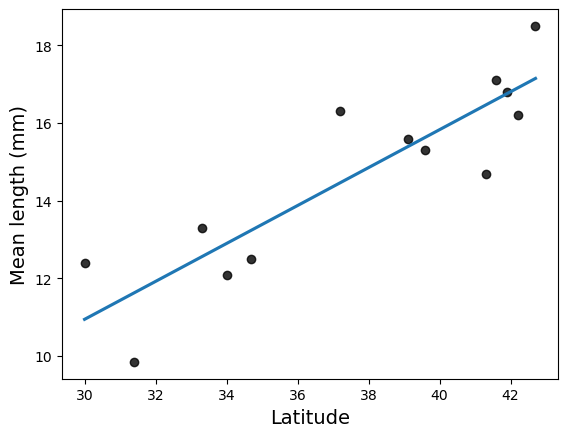

In [4]:
# regplot() creates a scatter plot with the regression line overlaid
p = sns.regplot(data=crabs, x='latitude', y='mean_mm', ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Latitude', fontsize=14);
p.set_ylabel('Mean length (mm)', fontsize=14);

In [5]:
# Calculate predicted values and residuals
yPredicted = linModel.predict(X)
yResid = yPredicted - y

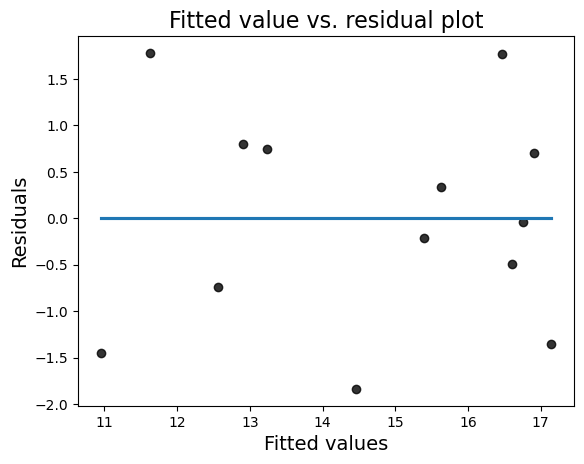

In [6]:
# Scatter plot with predicted values vs. residuals
# Points should be scattered around a horizontal line at y=0 with no obvious pattern
p = sns.regplot(x=yPredicted, y=yResid, ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Fitted values', fontsize=14);
p.set_ylabel('Residuals', fontsize=14);
p.set_title('Fitted value vs. residual plot', fontsize=16);

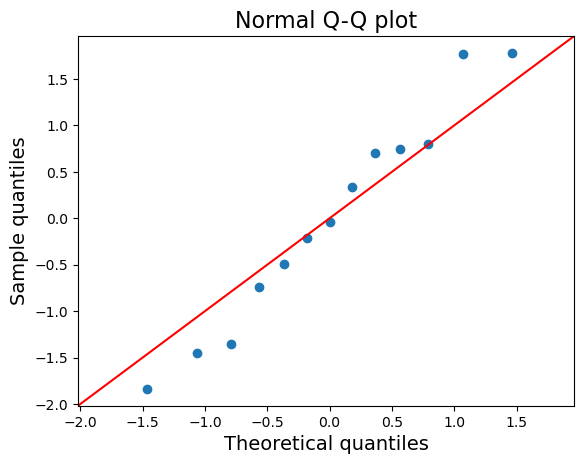

In [7]:
# Residuals must be stored as a flattened array
resid = np.ravel(yResid)

# Use qqplot() from statsmodels to make a QQ plot
p = sm.qqplot(resid, line='45')

plt.title('Normal Q-Q plot', fontsize=16);
plt.xlabel('Theoretical quantiles', fontsize=14);
plt.ylabel('Sample quantiles', fontsize=14);